In [38]:
from pylab import*
from matplotlib import*
from scipy import*
from scipy.interpolate import interp1d

In [68]:
data = np.loadtxt('theta.txt').T
posh= np.loadtxt('psf_theta.txt')
eve= np.loadtxt('events.txt').T
def simpsos (x,fx):
    inte=0
    a=fx[0]
    b=fx[len(fx)-1]
    h=((x[len(x)-1]-x[0])/(len(x)))
    st=(len(fx)//2)-1
    for i in range (1,st):
        inte+=2*fx[2*i]
    for i in range (1,st+1):
        inte+=4*fx[(2*i)-1]
    inte+=a+b
    inte*=(h)/3   
    return inte

In [79]:


x_i = data
y_i = posh



x = np.linspace((0*pi/180),(0.2*pi/180),1000)
P=empty(15)
test=empty(15)
for i in range (15):
    P = interp1d(x_i*pi/180,y_i[i],'cubic')
    R=P(x)
    test[i]=simpsos(x,R)



In [80]:
noeve=eve[0]
emin=eve[1]
emax=eve[2]
exposure=eve[3]
tester=2.*noeve/(emax+emin)/exposure/test

In [81]:
#test=simpsos(x,P)
print(test)


[  1.73634375   3.51536533   6.64364058  11.00724338  19.2844348
  30.12827662  44.54880051  64.21102001  86.69501684 113.53901345
 144.46812222 177.00676969 211.12443222 241.39686432 268.86741584]


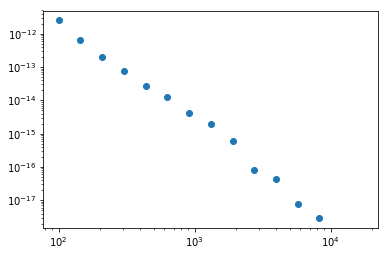

In [84]:
energy=(emax+emin)/2
plot(energy,tester,'o')
yscale('log')
xscale('log')
show()